In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import FloatSlider

165.58955


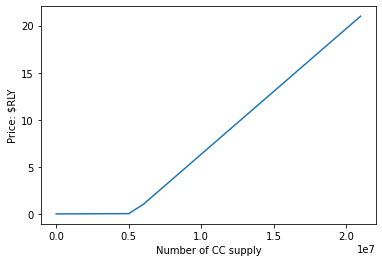

In [2]:
M = 1000000
supply = [0, 5030000, 5100000, 6000000, 21000000]
price = [0, 0.03, 0.13, 1, 21]
plt.plot(supply, price)
plt.xlabel("Number of CC supply")
plt.ylabel("Price: $RLY")
total_RLY = auc(supply, price)/M 
print(total_RLY)

In [3]:
def price_compute(million_sold):
    M = 1000000
    RLY_to_TWD_price = 4.36 ## 會改變
    max_cc = 21*M

    product_value_TWD = million_sold*M ### <-------------------------------------- 投入成本
    product_value_RLY = int(product_value_TWD/RLY_to_TWD_price)
    N_cc = int(np.sqrt(2*(16/21)*product_value_RLY*M))
    price_RLY = N_cc/M *(21/16)
    cc_to_RLY_to_TWD = int(N_cc*price_RLY*RLY_to_TWD_price)
    N_cc_include_genesis = N_cc + 5000000
    cc_to_RLY_to_TWD_include_genesis = int(N_cc_include_genesis*price_RLY*RLY_to_TWD_price)
    
    msg = "\n"
    msg += "\033[1m售出商品價值: {:,} TWD \033[0m 對應到 {:,} $RLY\n".format(product_value_TWD, product_value_RLY)
    msg += "對應到\033[1m{:,} CC\033[0m, 共剩餘\033[1m{:,} CC\033[0m(CC總數為2100萬)\n".format(N_cc, max_cc-N_cc)
    msg += "其幣價為 \033[1m{:,} $RLY/CC\033[0m  \n".format(price_RLY)
    msg += "-----------------------------------------------------------\n"
    msg += "出售{:,} CC結果可換到 {:,}個 $RLY\033[1m\n其等價現金為 {:,} TWD".format(N_cc, N_cc*price_RLY, cc_to_RLY_to_TWD)
    msg += "; 回報率為 %s \n \033[0m" % (cc_to_RLY_to_TWD/product_value_TWD) 
    print(msg)

In [4]:
print("  移動或輸入以下數值取得對應數據：")
interact(price_compute, million_sold=FloatSlider(min=1, max=200, step=0.05, value=10.0));

  移動或輸入以下數值取得對應數據：


interactive(children=(FloatSlider(value=10.0, description='million_sold', max=200.0, min=1.0, step=0.05), Outp…